In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 13.27 

### Part a)

Now for the C chart we calculate the following
$$ \overline{c} = \sum_{i=1}^{k} {\frac{c_i}{k}} $$ where k = 30 and $c_i$ is the number of defects in the i-th sample. Now Control limits for C chart are calculated using
$$ UCL_c = \overline{c} + 3\sqrt{\overline{c}} $$
$$ LCL_c = \overline{c} - 3\sqrt{\overline{c}} $$

In [2]:
Day = np.array(arange(1,31))
Missing_POs = np.array([12,6,8,16,14,6,12,8,16,4,12,10,12,6,10,4,6,4,14,8,8,10,10,2,12,12,8,4,4,8])
c_bar = Missing_POs.mean()
UCL_c = c_bar + 3*sqrt(c_bar)
LCL_c = c_bar - 3*sqrt(c_bar)
if (LCL_c<0):
    LCL_c = 0.0 
print 'Centerline of the C_chart is',c_bar
print 'UCL of C chart is',UCL_c,'and LCL is',LCL_c
print 'Note here LCL made to zero as LCL is less than zero'

Centerline of the C_chart is 8.86666666667
UCL of C chart is 17.7997512403 and LCL is 0.0
Note here LCL made to zero as LCL is less than zero


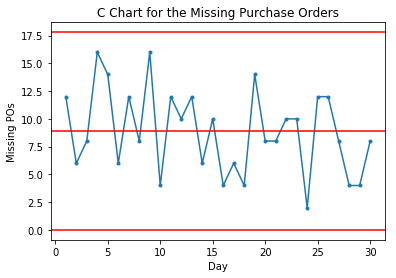

In [3]:
figure(figsize=(6,4))
plot(Day,Missing_POs,'.-')
plt.axhline(y=UCL_c, color='r', linestyle='-')
plt.axhline(y=LCL_c, color='r', linestyle='-')
plt.axhline(y=c_bar, color='r', linestyle='-')
ylabel('Missing POs')
xlabel('Day')
title('C Chart for the Missing Purchase Orders')

### Problem 13.27 b)

Since we see that 14 successive points oscillate up and down starting from day 6 there is an oscillatory trend in the C chart and we can say that the process is not in Statistical Control

### Problem 13.31  a)


To choose 3 defective out of 8 gears can be done in $\binom{8}{3}$ ways. <br>
We have to choose 5 non-defective and 3 defective gears. We can select 5 non-defective gears out of total 4700 in $\binom{4700}{5}$ ways and the 3 defective out of total 300 in $\binom{300}{3}$ ways. So for the selection of total 8 gears from a total of 5000 can be done in $\binom{4700}{5}*\binom{300}{3}$ ways. The number of ways is equal to $ 8.496*10^{22} $.

### Problem 13.31 b)
$P(defective) = p = 300/5000 $ <br>
$P(non defective) = 1 - p = 4700/5000 $ <br>
Now the selection of 3 defectives out of 8 total gears is a Binomial distribution with each Bernoulli trial being independent of each other. Here we denote X as the number of defective gears.
$ P (X = 3 ) = \binom{8}{3} [{\frac{300}{5000}}]^3 [{\frac{4700}{5000}}]^5 = 0.00887 $

### Problem 13.31 c)
Now for this part we have to calculate $ P (X >1)$. <br>

Now we can say that  <br>
Probability of defective greater than 1 = 1 - ( Probaility of no defective + Probability of 1 defective) <br>
$$ P (X>1) = 1 - (P(X=1) + P(X=0)) $$

$$ P (X>1) = 1 - (\binom{8}{0} [{\frac{300}{5000}}]^0 [{\frac{4700}{5000}}]^8 + \binom{8}{1} [{\frac{300}{5000}}]^1 [{\frac{4700}{5000}}]^7 ) $$
$$ P (X>1) = 1 - (0.609568938 + 0.311269245) $$
$$ P (X>1) = 0.07916 $$

So Probability of getting more than 1 defective is 0.07916.

### Problem 7

First we calculate the repeatability using the formula

$$ \sigma_e = \frac{\overline{R}}{d_2 (n= no. of trials)} $$

Standard procedure for calculating Reproducibility gives us 

$$ \sigma_o = \frac{R_o}{d_2 (n= no. of operators)} $$

and the adjusted reproducibilty gives us 

$$ \sigma'_{o}  = \sqrt{\sigma_{o}^{2}- \frac{\sigma_{e}^{2}}{nr}} $$ where n= number of parts and r = number of trials

For our problem the number of operators = number of trials = 3

In [4]:
df_gg = pd.read_csv('Problem7.csv')
df_gg

,Operator,Part,Trial No. 1,Trial No. 2,Trial No. 3,Average,Range
0,1,1,17,16,16,16.3,1
1,1,2,20,16,18,18.0,4
2,1,3,17,16,16,16.3,1
3,1,4,14,12,12,12.7,2
4,1,5,16,19,20,18.3,4
5,2,1,16,19,20,18.3,4
6,2,2,16,16,20,17.3,4
7,2,3,16,15,16,15.7,1
8,2,4,16,12,12,13.3,4
9,2,5,20,18,20,19.3,2


In [5]:
Op_Average = np.array([16.33,16.80,16.73])
R_bar = 3.1
d2 = 1.693
sigma_e = R_bar / d2
R_o = max(Op_Average) - min(Op_Average)
sigma_o = R_o / d2
n = 5
r = 3
temp = (sigma_o*sigma_o)-((sigma_e*sigma_e)/(n*r))
if (temp >0):
    sigma_oadj = math.sqrt((sigma_o*sigma_o)-((sigma_e*sigma_e)/(n*r)))
else :
    sigma_oadj = 0.0
print 'Repeatability value is', sigma_e
print 'Adjusted Reproducibility value is', sigma_oadj

Repeatability value is 1.83106910809
Adjusted Reproducibility value is 0.0


To characterize the part variability we calculate 

$$ \sigma_p = \frac{R_p}{d_2(n= number of parts)} $$

Here number of parts = 5 so $ d_2 = 2.326 $

First we calculate the average of each part
 
$$ \overline{X_1}=\frac{17+16+16+16+19+20+15+19+20}{9} = 17.56$$
$$ \overline{X_2}=\frac{20+16+18+16+16+20+16+17+22}{9} = 17.89$$
$$ \overline{X_3}=\frac{17+16+16+16+15+16+13+15+16}{9} = 15.56$$
$$ \overline{X_4}=\frac{14+12+12+16+12+12+16+12+12}{9} = 13.11$$
$$ \overline{X_5}=\frac{16+19+20+20+18+20+19+19+20}{9} = 19$$

So here $ R_p = 19 - 13.11 = 5.89 $

And so $$ \sigma_p = \frac{5.89}{2.326} = 2.53 $$

$$ \sigma_{m}  = \sqrt{{\sigma'}_{o}^{2}+ \sigma_{e}^{2}} = 1.831 $$
$$ \sigma_{T}  = \sqrt{{\sigma}_{p}^{2}+ \sigma_{m}^{2}} = 3.123 $$ 
 Gage R&R Ratio  $ = \frac{\sigma_{m}}{\sigma_{T}} =  $ = 58.63 %
 

Now if we use the Alternative method as described in class we get

Reproducibility as 

$$ \sigma_o = \frac{\overline{R_o}}{d_2 (n= no. of operators)} $$

where $ \overline{R_o} = \frac{\sum_{i=1}^{n} R_i}{n} $

Now $$ R_1 = max(16.3,18.3,18) - min(16.3,18.3,18) = 2 $$
$$ R_2 = max(18,17.3,18.3) - min(18,17.3,18.3) = 1 $$
$$ R_3 = max(16.3,15.7,14.7) - min(16.3,15.7,14.7) = 1.6 $$
$$ R_4 = max(12.7,13.3,13.3) - min(12.7,13.3,13.3) = 0.6 $$
$$ R_5 = max(18.3,19.3,19.3) - min(18.3,19.3,19.3) = 1 $$

$$ \overline{R_o} = \frac{2+1+1.6+0.6+1}{5} = 1.24 $$
$$ \sigma_o = 1.24/1.693 =0.7325 $$

$$ \sigma_o = 1.24/1.693 =0.7325 $$

$$ \sigma'_{o}  = \sqrt{\sigma_{o}^{2}- \frac{\sigma_{e}^{2}}{nr}} = 0.5595 $$

So $$ \sigma_{m}  = \sqrt{{\sigma'}_{o}^{2}+ \sigma_{e}^{2}} = 1.9145 $$
$$ \sigma_{T}  = \sqrt{{\sigma}_{p}^{2}+ \sigma_{m}^{2}} = 3.173 $$ 
Gage R&R Ratio  $ = \frac{\sigma_{m}}{\sigma_{T}} = \frac{1.9145}{3.173} $ = 60.34 %

### Problem 8

First we will upload the data and then find the eigenvalues 

In [2]:
df = pd.read_csv('Homework5Problem8.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8
0,6.272646,2.550910,6.577791,9.460077,5.649544,0.570897,3.765024,5.106109
1,-1.798069,-0.916809,3.431620,4.002850,-2.096944,-3.035373,-1.699812,-5.640484
2,6.032972,6.142293,6.005361,11.877058,3.633926,4.773166,5.894295,6.017212
3,-2.095268,-2.850398,3.144658,3.364193,-1.573628,-5.132370,-4.534144,-6.295076
4,0.733322,-2.895519,2.995482,4.372470,1.530257,-4.696704,-2.683881,-2.478275
5,1.000998,2.112294,5.045637,7.147082,0.036786,0.406146,1.258421,-1.078994
6,7.333188,6.075516,6.210789,12.295317,5.326045,3.456533,5.737382,7.185918
7,4.337772,0.344884,4.625744,7.419322,4.353576,-1.919331,0.088327,2.342323
8,7.319089,-0.172511,4.450725,8.027948,7.614688,-0.726931,0.251688,5.932515
9,1.944389,1.358833,4.180568,6.373755,1.147118,-0.545105,-0.185808,-0.723225


First we Standardize all the X values to their Z scores.

In [3]:
df['Z1']= (df['X1']-df['X1'].mean())/(df['X1'].std())
df['Z2']= (df['X2']-df['X2'].mean())/(df['X2'].std())
df['Z3']= (df['X3']-df['X3'].mean())/(df['X3'].std())
df['Z4']= (df['X4']-df['X4'].mean())/(df['X4'].std())
df['Z5']= (df['X5']-df['X5'].mean())/(df['X5'].std())
df['Z6']= (df['X6']-df['X6'].mean())/(df['X6'].std())
df['Z7']= (df['X7']-df['X7'].mean())/(df['X7'].std())
df['Z8']= (df['X8']-df['X8'].mean())/(df['X8'].std())
df = df[['Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8']]
df       

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8
0,0.757043,0.142943,1.080772,0.390393,0.922203,0.142703,0.743913,0.718483
1,-1.080184,-0.965518,-1.099107,-1.128253,-0.985810,-0.979221,-0.760197,-1.149306
2,0.702483,1.290934,0.684154,1.062994,0.425743,1.450045,1.329962,0.876835
3,-1.147838,-1.583593,-1.297934,-1.305979,-0.856914,-1.631605,-1.540302,-1.263076
4,-0.503935,-1.598016,-1.401293,-1.025395,-0.092406,-1.496067,-1.031046,-0.599705
5,-0.443001,0.002739,0.019192,-0.253271,-0.460258,0.091448,0.054010,-0.356506
6,0.998466,1.269589,0.826488,1.179388,0.842523,1.040435,1.286774,1.079960
7,0.316586,-0.562216,-0.271738,-0.177512,0.602997,-0.632016,-0.268040,0.238129
8,0.995257,-0.727602,-0.393003,-0.008143,1.406232,-0.261056,-0.223077,0.862115
9,-0.228246,-0.238106,-0.580185,-0.468474,-0.186775,-0.204490,-0.343491,-0.294672


Now we find out the Correlation matrix for the X variables

In [8]:
A_mat = df.corr()
A_mat

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8
Z1,1.000000,0.697114,0.887277,0.856269,0.973838,0.679180,0.842725,0.995770
Z2,0.697114,1.000000,0.848182,0.954196,0.520231,0.974717,0.949870,0.748176
Z3,0.887277,0.848182,1.000000,0.918262,0.793620,0.826274,0.906540,0.908712
Z4,0.856269,0.954196,0.918262,1.000000,0.723386,0.930987,0.973843,0.890557
Z5,0.973838,0.520231,0.793620,0.723386,1.000000,0.506025,0.708315,0.953051
Z6,0.679180,0.974717,0.826274,0.930987,0.506025,1.000000,0.925859,0.728830
Z7,0.842725,0.949870,0.906540,0.973843,0.708315,0.925859,1.000000,0.877240
Z8,0.995770,0.748176,0.908712,0.890557,0.953051,0.728830,0.877240,1.000000


Now we find out the eigen values and eigen vectors 

In [9]:
eig = linalg.eig(A_mat)
Eigen_values = eig[0]
Eigen_vectors = eig[1]
print 'The Eigen values are ',Eigen_values 
print 'The Eigen vectors are ',Eigen_vectors

The Eigen values are  [  6.89212729e+00   9.30074510e-01   9.88801950e-02   4.05270211e-02
   2.53372678e-02   9.69966730e-03   8.12642857e-04   2.54141053e-03]
The Eigen vectors are  [[ 0.35540182  0.36884282  0.14073474  0.07240624 -0.01252616  0.13554303
  -0.83201609 -0.04261454]
 [ 0.34448784 -0.43186132  0.06854977 -0.1682647  -0.27831047  0.70805307
   0.08627163 -0.27490578]
 [ 0.36421258  0.02381976 -0.92781496 -0.00850317  0.05431477 -0.05399275
  -0.00107689 -0.00156329]
 [ 0.37257347 -0.16697809  0.13857199 -0.1409894  -0.66704896 -0.59087663
   0.00974249  0.00653396]
 [ 0.31632224  0.57396725  0.14371861  0.14344631  0.06353307 -0.03386817
   0.44897231 -0.56789992]
 [ 0.33816608 -0.4459695   0.14122202  0.74148082  0.30687876 -0.150805
   0.00554534  0.00836526]
 [ 0.3693801  -0.18214458  0.19408458 -0.61138862  0.61083866 -0.21351877
   0.01231316  0.00714643]
 [ 0.36427758  0.29580038  0.1310891   0.04824228 -0.05609882  0.24240268
   0.3137704   0.77455426]]


Now calculating $ \eta $ to find out the number of Principle Components to keep

$$ \eta = \frac{\lambda_1 + \lambda_2 }{\sum_{i=1}^{8} \lambda_i} = 97.78\% $$ so we just keep the first two principal components corresponding to eigen values of $$ \lambda_1 = 6.8921, \lambda_2 = 0.93  $$

So the two Principle Components are:
$$ PC_1 = 0.3554Z_1 + 0.3688Z_2 + 0.1407Z_3 + 0.0724Z_4 - 0.0125Z_5 + 0.1355Z_6 - 0.8320Z_7 - 0.0426Z_8 $$
$$ PC_2 = 0.3444Z_1 - 0.4318Z_2 + 0.0685Z_3 - 0.1682Z_4 - 0.2783Z_5 + 0.7080Z_6 + 0.0862Z_7 - 0.2749Z_8 $$

Now we calculate Principal Components and plot them

In [12]:
df['PC1'] = 0.3554*df['Z1'] + 0.3688*df['Z2'] + 0.1407*df['Z3'] + 0.0724*df['Z4'] - \
0.0125*df['Z5'] + 0.1355*df['Z6'] - 0.8320*df['Z7'] - 0.0426*df['Z8']
df['PC2'] = 0.3444*df['Z1'] - 0.4318*df['Z2'] + 0.0685*df['Z3'] - 0.1682*df['Z4'] - \
0.2783*df['Z5'] + 0.7080*df['Z6'] + 0.0862*df['Z7'] - 0.2749*df['Z8']

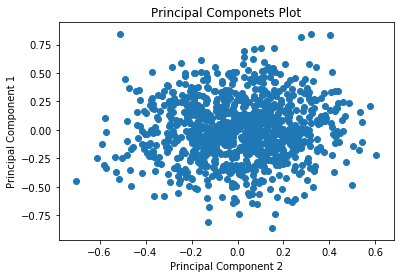

In [13]:
figure(figsize=(6,4))
plt.scatter(df.PC1, df.PC2)
ylabel('Principal Component 1')
xlabel('Principal Component 2')
title('Principal Componets Plot')